In [37]:
# Import the following libraries
%matplotlib inline

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.layers import Dropout, Input, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt

import keras as k

#### 1 - Load Dataset
We will be using the MNIST dataset which contains photos of handwritten digits. Keras already comes with this dataset, so we can load it directly with library functions as follows:

In [38]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### 2 - Inspect Data
Start by inspecting the data. Write code to output the following: 
- The shape of the training data
- The shape of the testing data
- The total number of outputs
- A lit of the output classes
- Display the first image in the training data
- Display the first image in the training data

Training data shape : 47040000
Testing data shape : 7840000
Total number of outputs : 70000
Output classes : [5, 0, 4, 1, 9, 2, 3, 6, 7, 8]


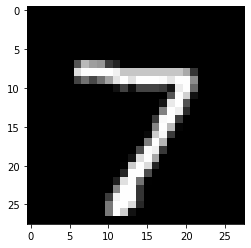

In [39]:
### ======== YOUR CODE HERE ========== ###

# Print shape of training data
print('Training data shape : {}'.format(train_images.size))
 
# Print shape of testing data    
print('Testing data shape : {}'.format(test_images.size))
 
# Print the total number of outputs
print('Total number of outputs : {}'.format(train_labels.size+test_labels.size))

# Print the list of output classes
uni = []
for lb in train_labels:
    if lb not in uni:
        uni.append(lb)
    

print('Output classes : {}'.format(uni))
 
# Display the first image in the training data    

plt.imshow(train_images[0], cmap = 'gray')
    
# Display the first image in the testing data  

plt.imshow(test_images[0], cmap = 'gray')

#### 3 - Preprocess Data
As usual, we need to preprocess our data. Write code to do the following:
- Reshape the images from a 28x28 matrix to 784 flattend array (28x28=784), so it can be fed into the network as a single feature
- Convert the datatype to 'float32' and then normalie the pixels so the values range between 0 and 1 (Hint: The current values range from 0 to 255).

In [61]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [62]:
# X_train = train_images
# X_test = test_images

In [63]:
# Change to data type to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [64]:
# Normalize the data to a scale between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

In [65]:
X_train[0]

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0

#### 4 - Convert Labels 
Conver the labels from integer to categorical (one-hot encoding). We have to do this conversion, because that is the format required by Keras to perform multiclass classification. One-hot encoding converts the integer to an array of all zeros except a 1 at the index of the integer.

For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

In [66]:
### ======== YOUR CODE HERE ========== ###
# Change the labels from integer to categorical data and store this in a new variable 
# (Hint: Use the to_categorical function in keras)

y_train = to_categorical(train_labels,10)
y_test = to_categorical(test_labels,10)

In [67]:
# Display the original and converted labels the item in the dataset
y_train.shape

(60000, 10)

In [68]:
X_train.shape

(60000, 28, 28, 1)

#### 5 - Create model

Create a sequential model with the following architecture:
- an input dense layer of 512 units using the ReLU activation function, with input dimension of 784
- a dense layer of 512 units with the ReLU activation function
- a output layer of 10 units with the softmax activation function (output layer)

In [69]:
# Run cell to get rid of some warnings later on

def noWarnings():
    import os
    os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '0'
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
    from tensorflow import logging
    logging.set_verbosity(logging.INFO)

In [70]:
### ======== YOUR CODE HERE ========== ###

# Create sequential model
noWarnings()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                 input_shape=input_shape,name='input'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', 
                 input_shape=input_shape))

model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512,input_shape = (784,),activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

#### 6 - Compile Model

Compile the model with an **rmsprop optimizer, categorical_crossentropy loss, and accuracy metrics**. You can try other optimizers too such as sgd.

In [71]:
# Compile model
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

#### 7 - Train model
Fit the model and train for **20 epochs** and a **batch size of 256**.

In [72]:
history = model.fit(X_train, y_train, verbose=True, epochs=20, batch_size = 256)
model.save('./stuff.h5')

W0829 21:10:32.667521  9480 deprecation.py:323] From c:\users\bp\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 21:10:32.719421  9480 deprecation_wrapper.py:119] From c:\users\bp\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:766: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0829 21:10:32.727410  9480 deprecation.py:506] From c:\users\bp\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:519: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dt

Epoch 1/20
60000/60000 [==============================] - 27s - loss: 2.3017 - acc: 0.1120    
Epoch 2/20
60000/60000 [==============================] - 28s - loss: 2.3014 - acc: 0.1124    
Epoch 3/20
60000/60000 [==============================] - 30s - loss: 2.3014 - acc: 0.1124    
Epoch 4/20
60000/60000 [==============================] - 34s - loss: 2.3013 - acc: 0.1124    
Epoch 5/20
60000/60000 [==============================] - 33s - loss: 2.3013 - acc: 0.1124    
Epoch 6/20
60000/60000 [==============================] - 29s - loss: 2.3013 - acc: 0.1124    
Epoch 7/20
60000/60000 [==============================] - 30s - loss: 2.3013 - acc: 0.1124    
Epoch 8/20
60000/60000 [==============================] - 29s - loss: 2.3013 - acc: 0.1124    
Epoch 9/20
60000/60000 [==============================] - 29s - loss: 2.3013 - acc: 0.1124    
Epoch 10/20
60000/60000 [==============================] - 29s - loss: 2.3013 - acc: 0.1124    
Epoch 11/20
60000/60000 [========================

In [73]:
### ======== YOUR CODE HERE ========== ###
from keras.models import load_model
#Load model
model = load_model('.\stuff.h5')

#### 8 - Evaluate model
Report the loss and accuracy on the test data. (Hint: Use the built in *model.evaluate* function in keras)

In [74]:
### ======== YOUR CODE HERE ========== ###

loss, acc = model.evaluate(X_test, y_test)

# Report loss and accuracy on test data
print('Test loss:', loss)
print('Test accuracy:', acc)

 9920/10000 [============================>.] - ETA: 0sTest loss: 2.301043939971924
Test accuracy: 0.1135


#### 9 - Plot results
- Plot the loss curves for both training and validation
- Plot the accuracy curves for both training and validation

Hint: Use the *.history* function to access these results.

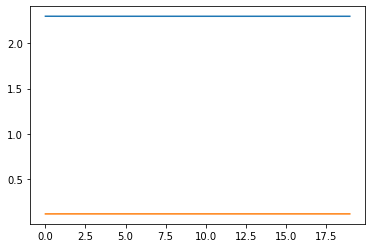

In [75]:
### ======== YOUR CODE HERE ========== ###

# Plot the Loss Curves

plt.plot(history.history['loss'])    
     
# Plot the Accuracy Curves
plt.plot(history.history['acc'])

#### 10 - Regularization
If done properly, you will notice there is some overfitting in the model. To overcome this, we will use a regularization method called **dropout** which you will learn in the CNN lecture. This requires simply adding dropout layers into our model. To do so, repeat steps 5-8 with the following architecture.
- an input dense layer of 512 units using the ReLU activation function, with input dimension of 784
- a dropout layer with 0.5 dropout rate
- a dense layer of 512 units with the ReLU activation function
- a dropout layer with 0.5 dropout rate
- a output layer of 10 units with the softmax activation function (output layer)

In [105]:
from keras.layers import Dropout

In [131]:
### ======== YOUR CODE HERE ========== ###

# Repeat step 5 with new architecture
new_model = Sequential()
new_model.add(Dense(512,input_shape = (784,), activation = 'relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(512, activation = 'relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(10, activation = 'softmax'))


In [132]:
# Repeat step 6 with new model
new_model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [133]:
X_train.shape

(60000, 784)

In [134]:
y_train.shape

(60000, 10)

In [135]:
# Repeat step 7 with new model
history = new_model.fit(X_train, y_train, verbose=True, epochs=20, batch_size = 256)
model.save('./new_stuff.h5')

Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.4028 - acc: 0.8763
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1707 - acc: 0.9477
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1306 - acc: 0.9608: 0s - loss: 0.1307 - acc: 0.
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1077 - acc: 0.9657
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0922 - acc: 0.9710
Epoch 6/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.0845 - acc: 0.9732
Epoch 7/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0747 - acc: 0.9769
Epoch 8/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0693 - acc: 0.9787
Epoch 9/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0643 - acc: 0.9786
Epoch 10/20
60000/60000 [==============================] - 5s 90us/ste

In [136]:
# Repeat step 8 with new model
### ======== YOUR CODE HERE ========== ###

loss, acc = new_model.evaluate(X_test, y_test)

# Report loss and accuracy on test data
print('Test loss:', loss)
print('Test accuracy:', acc)

10000/10000 [==============================] - 1s 80us/step
Test loss: 0.058619084055074926
Test accuracy: 0.9841


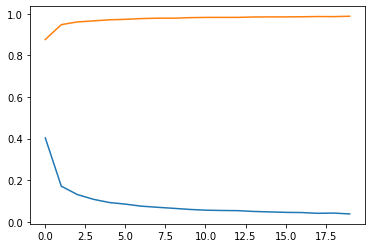

In [137]:
# Repeat step 9 with new model
### ======== YOUR CODE HERE ========== ###

# Plot the Loss Curves

plt.plot(history.history['loss'])    
     
# Plot the Accuracy Curves
plt.plot(history.history['acc'])

#### BONUS QUESTION - Modified MNIST
The modified MNIST dataset consists of images that contain multiple written digits with background noise. The labels for this dataset is the largest digit contained in the image. Your challenge will be to train a feed forward network to predict these labels. You can follow the same steps as in this assignment to create the feed forward neural network, but you will likely have to experiment with different data preprocessing techniques and network structures. You will also need to load the dataset yourself and put it into a form that is acceptable by keras.

The dataset can be downloaded from (https://techx.blob.core.windows.net/modified-mnist/modified-mnist.zip)[here].